In [1]:
!unzip /content/TimeGAN.zip -d ''

Archive:  /content/TimeGAN.zip
   creating: TimeGAN/.ipynb_checkpoints/
   creating: TimeGAN/__pycache__/
  inflating: TimeGAN/__pycache__/base_model.cpython-37.pyc  
  inflating: TimeGAN/__pycache__/base_model.cpython-39.pyc  
  inflating: TimeGAN/__pycache__/data_loading.cpython-37.pyc  
  inflating: TimeGAN/__pycache__/data_loading.cpython-39.pyc  
  inflating: TimeGAN/__pycache__/encoders.cpython-39.pyc  
  inflating: TimeGAN/__pycache__/preprocessing.cpython-39.pyc  
  inflating: TimeGAN/__pycache__/time_dataset.cpython-37.pyc  
  inflating: TimeGAN/__pycache__/time_dataset.cpython-39.pyc  
  inflating: TimeGAN/__pycache__/timegan.cpython-37.pyc  
  inflating: TimeGAN/__pycache__/timegan.cpython-39.pyc  
  inflating: TimeGAN/__pycache__/utils.cpython-37.pyc  
  inflating: TimeGAN/__pycache__/utils.cpython-39.pyc  
  inflating: TimeGAN/__pycache__/visualization_metrics.cpython-39.pyc  
   creating: TimeGAN/data/
   creating: TimeGAN/data/.ipynb_checkpoints/
  inflating: TimeGAN/dat

In [2]:
%cd /content/TimeGAN

/content/TimeGAN


In [9]:
!python main.py

(19711, 24, 28)
Preprocessing Complete!
Saved real data!
Start Embedding Network Training
Finish Embedding Network Training
Start Training with Supervised Loss Only
Finish Training with Supervised Loss Only
Start Joint Training
Finish Joint Training


## Looking at the Synthetic Data

In [3]:
import numpy as np 
from metrics.visualization_metrics import visualization

with open('data/energy_synthetic_data.npy', 'rb') as f:
    generated_data = np.load(f)

with open('data/energy_real_data.npy', 'rb') as f:
    ori_data = np.load(f)

print(ori_data.shape)
print(generated_data.shape)

(19711, 24, 28)
(19711, 24, 28)


In [10]:
from metrics.discriminative_metrics import discriminative_score_metrics
from metrics.predictive_metrics import predictive_score_metrics


## Evaluate the generated data
### 1. Discriminative score
To evaluate the classification accuracy between original and synthetic data using post-hoc RNN network. The output is |classification accuracy - 0.5|.



*   metric_iteration: the number of iterations for metric computation.




In [12]:
metric_iteration = 5

discriminative_score = list()
for _ in range(metric_iteration):
  temp_disc = discriminative_score_metrics(ori_data, generated_data)
  discriminative_score.append(temp_disc)

print('Discriminative score: ' + str(np.round(np.mean(discriminative_score), 4)))

/content/TimeGAN/metrics/discriminative_metrics.py:81: UserWarning: `tf.nn.rnn_cell.GRUCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.GRUCell`, and will be replaced by that in Tensorflow 2.0.
  d_cell = tf1.nn.rnn_cell.GRUCell(num_units=hidden_dim, activation=tf.nn.tanh, name = 'd_cell')
/usr/local/lib/python3.7/dist-packages/keras/layers/legacy_rnn/rnn_cell_impl.py:573: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  initializer=self._kernel_initializer)
/usr/local/lib/python3.7/dist-packages/keras/layers/legacy_rnn/rnn_cell_impl.py:579: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  tf.compat.v1.constant_initializer(1.0, dtype=self.dtype)))
/usr/local/lib/python3.7/dist-packages/keras/layers/legacy_rnn/rnn_cell_impl.py:583: UserWarning: `layer.add_va

Discriminative score: 0.4674


## Evaluate the generated data

### 2. Predictive score
To evaluate the prediction performance on train on synthetic, test on real setting. More specifically, we use Post-hoc RNN architecture to predict one-step ahead and report the performance in terms of MAE.

In [13]:
predictive_score = list()
for tt in range(metric_iteration):
  temp_pred = predictive_score_metrics(ori_data, generated_data)
  predictive_score.append(temp_pred)   
    
print('Predictive score: ' + str(np.round(np.mean(predictive_score), 4)))

/content/TimeGAN/metrics/predictive_metrics.py:72: UserWarning: `tf.nn.rnn_cell.GRUCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.GRUCell`, and will be replaced by that in Tensorflow 2.0.
  p_cell = tf1.nn.rnn_cell.GRUCell(num_units=hidden_dim, activation=tf.nn.tanh, name = 'p_cell')
/usr/local/lib/python3.7/dist-packages/keras/layers/legacy_rnn/rnn_cell_impl.py:573: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  initializer=self._kernel_initializer)
/usr/local/lib/python3.7/dist-packages/keras/layers/legacy_rnn/rnn_cell_impl.py:579: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  tf.compat.v1.constant_initializer(1.0, dtype=self.dtype)))
/usr/local/lib/python3.7/dist-packages/keras/layers/legacy_rnn/rnn_cell_impl.py:583: UserWarning: `layer.add_variab

Predictive score: 0.2895


### 3. Visualization

We visualize the original and synthetic data distributions using PCA and tSNE analysis.

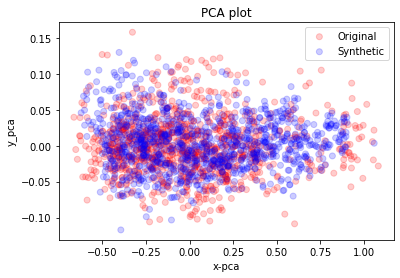

d:\miniconda\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\miniconda\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.000s...
[t-SNE] Computed neighbors for 2000 samples in 0.052s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.049642
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.483006
[t-SNE] KL divergence after 300 iterations: 1.438346


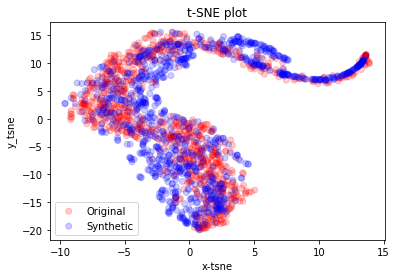

In [4]:
visualization(ori_data, generated_data, 'pca')
visualization(ori_data, generated_data, 'tsne')

In [13]:
!zip -r /content/timegan.zip /content/TimeGAN

  adding: content/TimeGAN/ (stored 0%)
  adding: content/TimeGAN/main.py (deflated 63%)
  adding: content/TimeGAN/metrics/ (stored 0%)
  adding: content/TimeGAN/metrics/visualization_metrics.py (deflated 65%)
  adding: content/TimeGAN/metrics/__init__.py (stored 0%)
  adding: content/TimeGAN/metrics/predictive_metrics.py (deflated 59%)
  adding: content/TimeGAN/metrics/discriminative_metrics.py (deflated 65%)
  adding: content/TimeGAN/metrics/__pycache__/ (stored 0%)
  adding: content/TimeGAN/metrics/__pycache__/data.cpython-37.pyc (deflated 44%)
  adding: content/TimeGAN/metrics/__pycache__/predictive_metrics.cpython-39.pyc (deflated 46%)
  adding: content/TimeGAN/metrics/__pycache__/visualization_metrics.cpython-37.pyc (deflated 45%)
  adding: content/TimeGAN/metrics/__pycache__/discriminative_metrics.cpython-39.pyc (deflated 43%)
  adding: content/TimeGAN/metrics/__pycache__/__init__.cpython-39.pyc (deflated 23%)
  adding: content/TimeGAN/metrics/__pycache__/data.cpython-39.pyc (def